# 训练结果分析

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read training log file
with open('training_log.txt', 'r') as f:
    log_text = f.read()

## 损失函数

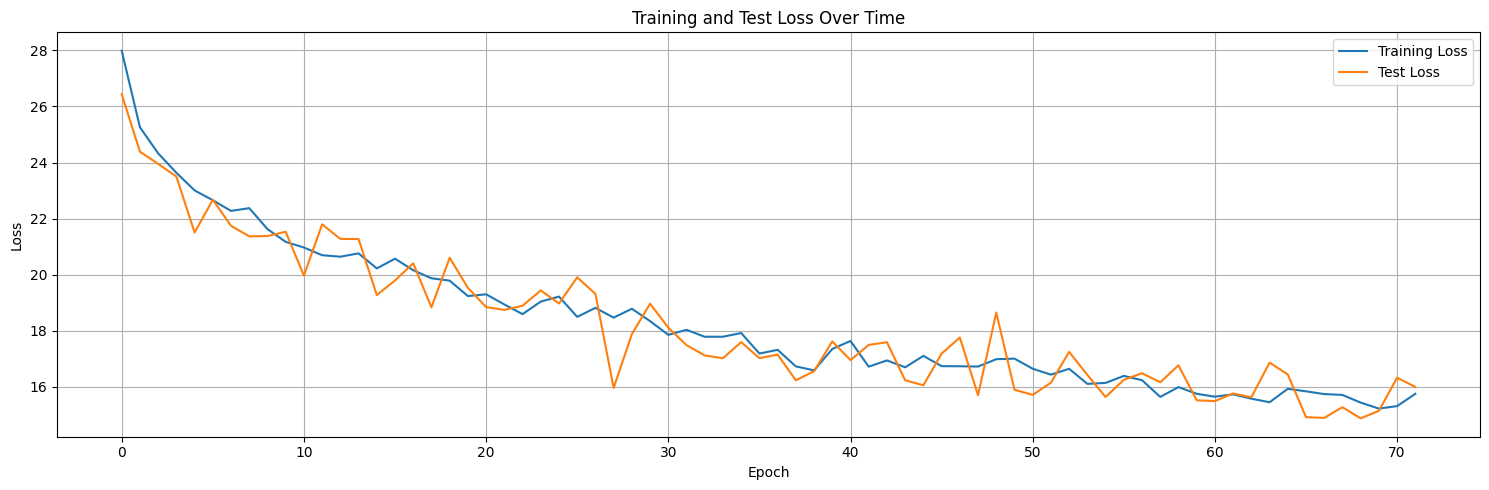

In [3]:
# 初始化列表用于收集训练和测试损失
train_loss = []  
test_loss = []  

with open('training_log.txt', 'r') as f:
    log_content = f.readlines()
# 正则表达式用于捕获epoch、迭代次数和损失值
train_epoch_regex = re.compile(r'Epoch: \[(\d+)\].*\[\s*(\d+)/\s*(\d+)\].*loss: ([\d.]+) \(')  
test_loss_regex = re.compile(r'Averaged stats:.*loss: ([\d.]+)')   
    
# 用字典存储每个epoch的损失
epoch_losses = {}

for line in log_content:  
    # 匹配并提取训练损失
    train_match = train_epoch_regex.search(line)  
    if train_match:  
        epoch, batch, total_batches, loss = train_match.groups()
        epoch = int(epoch)
        if epoch not in epoch_losses:
            epoch_losses[epoch] = []
        epoch_losses[epoch].append(float(loss))

    # 匹配并提取平均测试损失
    test_match = test_loss_regex.search(line)  
    if test_match:  
        test_loss.append(float(test_match.group(1)))  

# 计算每个epoch的平均损失
epochs = sorted(epoch_losses.keys())
train_losses = [np.mean(epoch_losses[e]) for e in epochs]
test_losses = test_loss  # 测试损失已经是每个epoch的平均值

# 创建图形
plt.figure(figsize=(15, 5))

# 在同一坐标轴上绘制两种损失
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(range(len(test_losses)), test_losses, label='Test Loss') 
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

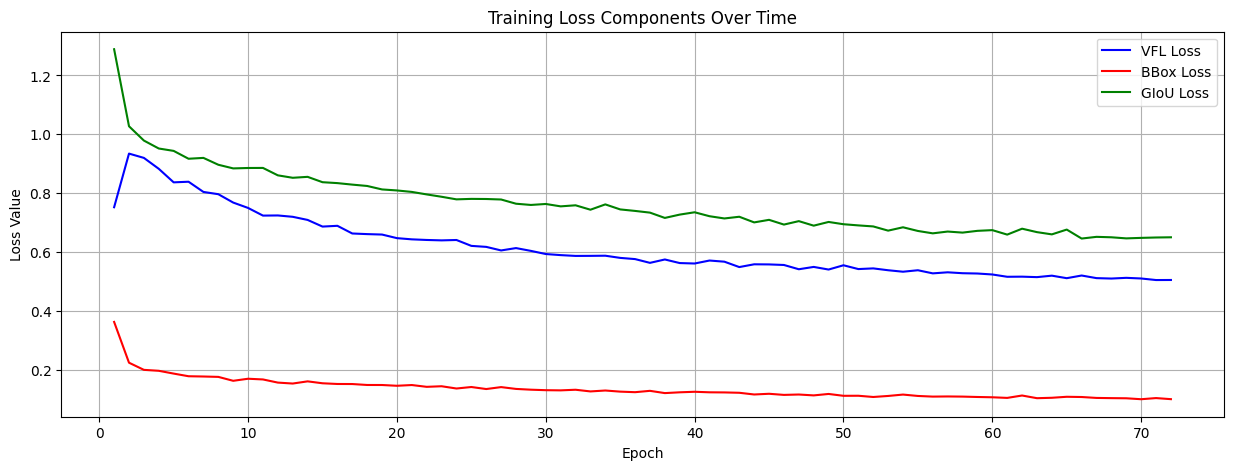

In [10]:
# Extract individual loss components
vfl_pattern = r"Averaged stats:.*?loss_vfl: \d+\.\d+ \((\d+\.\d+)\)"
bbox_pattern = r"Averaged stats:.*?loss_bbox: \d+\.\d+ \((\d+\.\d+)\)"
giou_pattern = r"Averaged stats:.*?loss_giou: \d+\.\d+ \((\d+\.\d+)\)"

vfl_matches = re.findall(vfl_pattern, log_text, re.MULTILINE)
bbox_matches = re.findall(bbox_pattern, log_text, re.MULTILINE)
giou_matches = re.findall(giou_pattern, log_text, re.MULTILINE)

vfl_losses = [float(x) for x in vfl_matches]
bbox_losses = [float(x) for x in bbox_matches]
giou_losses = [float(x) for x in giou_matches]

# Create epoch numbers
epochs = list(range(1, len(vfl_losses) + 1))

# Create the plot
plt.figure(figsize=(15, 5))

# Plot all three loss components
plt.plot(epochs, vfl_losses, 'b-', label='VFL Loss')
plt.plot(epochs, bbox_losses, 'r-', label='BBox Loss') 
plt.plot(epochs, giou_losses, 'g-', label='GIoU Loss')

plt.title('Training Loss Components Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.grid(True)
plt.legend()
plt.show()


## 运行速度

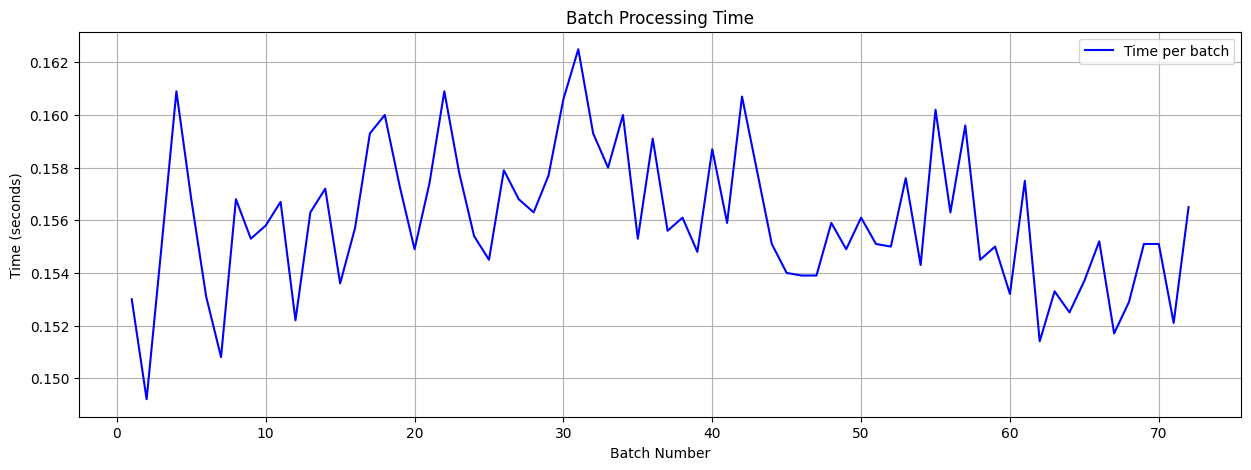

In [11]:
# Extract batch time information
time_pattern = r"Test: Total time: \d+:\d+:\d+ \((\d+\.\d+) s / it\)"
time_matches = re.findall(time_pattern, log_text, re.MULTILINE)
batch_times = [float(x) for x in time_matches]

# Create batch numbers 
batches = list(range(1, len(batch_times) + 1))

# Create the plot
plt.figure(figsize=(15, 5))

# Plot batch processing times
plt.plot(batches, batch_times, 'b-', label='Time per batch')

plt.title('Batch Processing Time')
plt.xlabel('Batch Number') 
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.legend()
plt.show()


## 评估指标

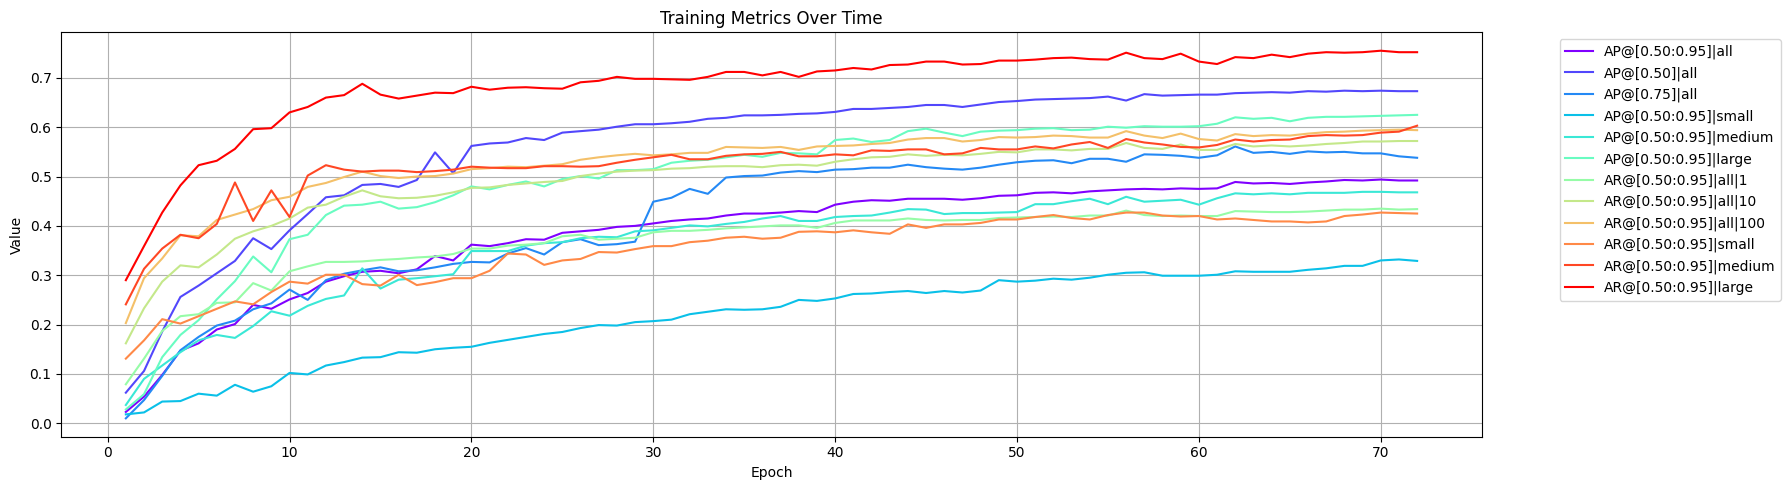

In [13]:
# Extract different AP and AR values using regex
metrics = {
    'AP@[0.50:0.95]|all': r"Average Precision  \(AP\) @\[ IoU=0\.50:0\.95 \| area=   all \| maxDets=100 \] = (\d+\.\d+)",
    'AP@[0.50]|all': r"Average Precision  \(AP\) @\[ IoU=0\.50      \| area=   all \| maxDets=100 \] = (\d+\.\d+)",
    'AP@[0.75]|all': r"Average Precision  \(AP\) @\[ IoU=0\.75      \| area=   all \| maxDets=100 \] = (\d+\.\d+)",
    'AP@[0.50:0.95]|small': r"Average Precision  \(AP\) @\[ IoU=0\.50:0\.95 \| area= small \| maxDets=100 \] = (\d+\.\d+)",
    'AP@[0.50:0.95]|medium': r"Average Precision  \(AP\) @\[ IoU=0\.50:0\.95 \| area=medium \| maxDets=100 \] = (\d+\.\d+)",
    'AP@[0.50:0.95]|large': r"Average Precision  \(AP\) @\[ IoU=0\.50:0\.95 \| area= large \| maxDets=100 \] = (\d+\.\d+)",
    'AR@[0.50:0.95]|all|1': r"Average Recall     \(AR\) @\[ IoU=0\.50:0\.95 \| area=   all \| maxDets=  1 \] = (\d+\.\d+)",
    'AR@[0.50:0.95]|all|10': r"Average Recall     \(AR\) @\[ IoU=0\.50:0\.95 \| area=   all \| maxDets= 10 \] = (\d+\.\d+)",
    'AR@[0.50:0.95]|all|100': r"Average Recall     \(AR\) @\[ IoU=0\.50:0\.95 \| area=   all \| maxDets=100 \] = (\d+\.\d+)",
    'AR@[0.50:0.95]|small': r"Average Recall     \(AR\) @\[ IoU=0\.50:0\.95 \| area= small \| maxDets=100 \] = (\d+\.\d+)",
    'AR@[0.50:0.95]|medium': r"Average Recall     \(AR\) @\[ IoU=0\.50:0\.95 \| area=medium \| maxDets=100 \] = (\d+\.\d+)",
    'AR@[0.50:0.95]|large': r"Average Recall     \(AR\) @\[ IoU=0\.50:0\.95 \| area= large \| maxDets=100 \] = (\d+\.\d+)"
}

# Create the plot
plt.figure(figsize=(18, 5))


# Plot all metrics
colors = plt.cm.rainbow(np.linspace(0, 1, len(metrics)))
for (metric_name, pattern), color in zip(metrics.items(), colors):
    matches = re.findall(pattern, log_text, re.MULTILINE)
    values = [float(x) for x in matches]
    metric_epochs = list(range(1, len(values) + 1))
    plt.plot(metric_epochs, values, '-', label=metric_name, color=color)

plt.title('Training Metrics Over Time')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
